In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.colors import LogNorm
from IPython.display import Image, display
import matplotlib as mpl
# mpl.use("pgf")
# mpl.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     "text.usetex": True,
#     "pgf.rcfonts": False,
#     "font.family": "sans-serif",
#     "font.size": 9,               # testi compatti per slide 12pt
#     "axes.titlesize": 10,
#     "axes.labelsize": 9,
#     "legend.fontsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "text.latex.preamble": r"""
# \usepackage{sansmath}
# \sansmath
# \providecommand{\mathdefault}[1]{#1}
# \providecommand{\textdefault}[1]{#1}
# """
# })

In [2]:

DATA_DIR = Path('../data/output_parallel')         # folder containing your .bin files
NAME = 'global_step_00250.bin' 
SX, SY = 256, 256            # grid size used in the simulation

arr = np.fromfile(DATA_DIR / NAME, dtype=np.float32)
arr = arr.reshape(SY, SX)
arr = np.maximum(arr, 1e-12)

vmin, vmax = float(arr.min()), float(arr.max())

arr2 = np.fromfile(Path('../data/output_nopbc/')  / NAME, dtype=np.float32)
arr2 = arr2.reshape(SY, SX)
arr2 = np.maximum(arr2, 1e-12)


/tmp/ipykernel_10034/617552643.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


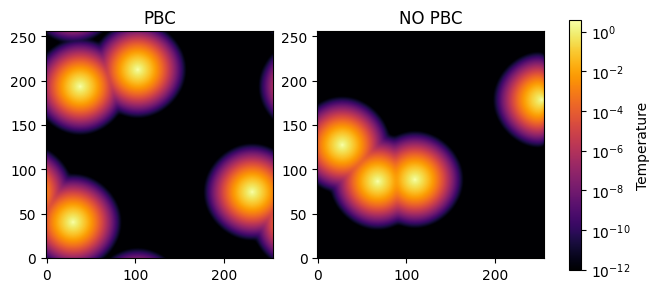

In [3]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.5, 3.2), constrained_layout=True)

norm = LogNorm(vmin=max(vmin, 1e-12), vmax=vmax)

im1 = ax1.imshow(arr, origin='lower', aspect='equal', norm=norm, cmap='inferno')
ax1.set_title('PBC')

im2 = ax2.imshow(arr2, origin='lower', aspect='equal', norm=norm, cmap='inferno')
ax2.set_title('NO PBC')

# Shared colorbar
fig.colorbar(im2, ax=[ax1, ax2], shrink=0.8, label='Temperature')
fig.show()
# fig.savefig("./slide/images/evolution.pgf", bbox_inches="tight", pad_inches=0.02)
# plt.close(fig)
